In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df = pd.read_excel('/mnt/Datasets/Cool-Farm-Tool-GHG-Inputs LATAM_v2.xlsx', sheet_name = 'Fertilizer-Manure')

df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop = True)
df = df.rename(columns = {'Harvest Year': 'Harvest Year', 'Field Name': 'Field Name', \
                          'Select Crop Name': 'Crop_Name', 'Enter Crop Area (ha)': 'Crop_Area_Ha', \
                         'Select Fertilizer Type': 'Fertilizer_Type', 'Enter Soil Organic Matter': 'Soil_Organic_Matter', \
                         'Select Manufacturing Region': 'Select_Manufacturing_Region', 'Enter Application Rate': 'Application_Rate_kg_per_Ha', \
                         'Select Rate Unit': 'Rate_Unit', 'Select Units of Product or Nutrient': 'Units_Of_Product_Or_Nutrient', \
                         'Select Application Method': 'Application_Method', 'Select Emissions Inihibitors': 'Emissions_Inhibitors', \
                          '% N as Urea': 'N_as_Urea_%', '% N as Nitrate': 'N_as_Nitrate_%','% N as Ammonium': 'N_as_Ammonium_%', \
                          '% P as Phosphorous': 'P_as_Phosphorus_%', '% P as P2O5': 'P_as_P2O5_%', '% K as Potassium': 'K_as_Potassium_%', \
                          '% K as K2O': 'K_as_K2O_%'})
df = df.drop_duplicates().reset_index(drop = True)

df = df[df['Fertilizer_Type'] == 'Compose your own NPK'].reset_index(drop = True)
df = df[['Harvest Year', 'Field Name', 'Application_Rate_kg_per_Ha']]

print(display(df))

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Harvest Year,Field Name,Application_Rate_kg_per_Ha
0,2021,M6V2143,200
1,2021,M6I2102,50
2,2021,M6I2103,50
3,2021,M6I2108,200
4,2021,M6I2114,200
...,...,...,...
614,2020,M6V2052,220
615,2021,M4V2103,166.7
616,2020,M6I20114,240
617,2021,M6V2170,200


None


In [70]:
df_2 = pd.read_excel('/mnt/Datasets/Cool-Farm-Tool-GHG-Inputs LATAM_v2.xlsx', 'Farm-Crop-Soil')
df_2.columns = df_2.iloc[0]
df_2 = df_2.iloc[1:].reset_index(drop = True)
df_2 = df_2.drop_duplicates()

df = df.merge(df_2, on = ['Field Name', 'Harvest Year'], how = 'left')[['Harvest Year', 'Field Name', 'Enter Total Wet Mass Harvested (kg)', \
                                                                       'Enter Dry Finished Yield Mass (kg)', 'Enter Crop Area (ha)', 'Application_Rate_kg_per_Ha']]

df['Wet_Mass_kg_per_ha'] = df['Enter Total Wet Mass Harvested (kg)'] / df['Enter Crop Area (ha)']
df['Dry_Mass_kg_per_ha'] = df['Enter Dry Finished Yield Mass (kg)'] / df['Enter Crop Area (ha)']

df = df.drop(columns = ['Enter Total Wet Mass Harvested (kg)', 'Enter Dry Finished Yield Mass (kg)'])

print(display(df))

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha
0,2021,M6V2143,72,200,9590.416667,4062.5
1,2021,M6I2102,125,50,7189.28,3771.52
2,2021,M6I2103,85,50,4777.294118,2577.411765
3,2021,M6I2108,104,200,6363.365385,3662.788462
4,2021,M6I2114,88,200,5389.886364,3268.409091
...,...,...,...,...,...,...
614,2020,M6V2052,137,220,5548.832117,2778.832117
615,2021,M4V2103,30,166.7,7186.0,4126.333333
616,2020,M6I20114,40,240,4527.25,2285.0
617,2021,M6V2170,48,200,6593.958333,3232.291667


None


In [71]:
df_2020 = df[df['Harvest Year'] == 2020].reset_index(drop = True)
print(display(df_2020))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha
0,2020,M2I2025,70,220,8445.285714,4560.428571
1,2020,M2I2026,80,220,7234.375,3651.875
2,2020,M2I2027,110,220,5850.181818,2936.818182
3,2020,M2I2039,153,220,7780.261438,4295.490196
4,2020,M6I2009,90,160,7678.888889,3732.777778
...,...,...,...,...,...,...
225,2020,M6V2044,75,200,4162.266667,1887.2
226,2020,M6V2045,94,200,4908.617021,2051.276596
227,2020,M6V2068,145,220,8051.103448,4800.896552
228,2020,M6V2052,137,220,5548.832117,2778.832117


None


In [72]:
df_2021 = df[df['Harvest Year'] == 2021].reset_index(drop = True)
print(display(df_2021))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha
0,2021,M6V2143,72,200,9590.416667,4062.5
1,2021,M6I2102,125,50,7189.28,3771.52
2,2021,M6I2103,85,50,4777.294118,2577.411765
3,2021,M6I2108,104,200,6363.365385,3662.788462
4,2021,M6I2114,88,200,5389.886364,3268.409091
...,...,...,...,...,...,...
384,2021,M6V2115,32,200,8481.875,4521.5625
385,2021,M6V2116,70,200,6156.285714,3201.714286
386,2021,M4V2103,30,166.7,7186.0,4126.333333
387,2021,M6V2170,48,200,6593.958333,3232.291667


None


In [73]:
df_season = pd.read_excel('/mnt/Datasets/PC003_consolidated_new (1).xlsx')
df_season['Field Name'] = df_season['Contrato legal'].str[6:]
df_season = df_season[['Field Name', 'Safra']]
df_season = df_season.rename(columns = {'Safra': 'Season'})

print(display(df_season))

,Field Name,Season
0,M4V1934,SUMMER
1,M6V1924,SUMMER
2,M6V19115,SUMMER
3,M4V1937,SUMMER
4,M4V1938,SUMMER
...,...,...
7151,M4I2324,WINTER
7152,M4I2305,WINTER
7153,M4I2315,WINTER
7154,M4I2321,WINTER


None


In [74]:
df_2020 = df_2020.merge(df_season, on = 'Field Name', how = 'left')
print(display(df_2020))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha,Season
0,2020,M2I2025,70,220,8445.285714,4560.428571,WINTER
1,2020,M2I2026,80,220,7234.375,3651.875,WINTER
2,2020,M2I2027,110,220,5850.181818,2936.818182,WINTER
3,2020,M2I2039,153,220,7780.261438,4295.490196,WINTER
4,2020,M6I2009,90,160,7678.888889,3732.777778,WINTER
...,...,...,...,...,...,...,...
302,2020,M6V2068,145,220,8051.103448,4800.896552,SUMMER
303,2020,M6V2068,145,220,8051.103448,4800.896552,SUMMER
304,2020,M6V2052,137,220,5548.832117,2778.832117,SUMMER
305,2020,M6V2052,137,220,5548.832117,2778.832117,SUMMER


None


In [75]:
df_2021 = df_2021.merge(df_season, on = 'Field Name', how = 'left')
print(display(df_2021))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha,Season
0,2021,M6V2143,72,200,9590.416667,4062.5,SUMMER
1,2021,M6I2102,125,50,7189.28,3771.52,WINTER
2,2021,M6I2102,125,50,7189.28,3771.52,WINTER
3,2021,M6I2103,85,50,4777.294118,2577.411765,WINTER
4,2021,M6I2108,104,200,6363.365385,3662.788462,WINTER
...,...,...,...,...,...,...,...
513,2021,M6V2116,70,200,6156.285714,3201.714286,SUMMER
514,2021,M4V2103,30,166.7,7186.0,4126.333333,SUMMER
515,2021,M4V2103,30,166.7,7186.0,4126.333333,SUMMER
516,2021,M6V2170,48,200,6593.958333,3232.291667,SUMMER


None


In [76]:
df_2020_winter = df_2020[df_2020['Season'] == 'WINTER'].reset_index(drop = True)
print(display(df_2020_winter))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha,Season
0,2020,M2I2025,70,220,8445.285714,4560.428571,WINTER
1,2020,M2I2026,80,220,7234.375,3651.875,WINTER
2,2020,M2I2027,110,220,5850.181818,2936.818182,WINTER
3,2020,M2I2039,153,220,7780.261438,4295.490196,WINTER
4,2020,M6I2009,90,160,7678.888889,3732.777778,WINTER
...,...,...,...,...,...,...,...
179,2020,M6I2035,60,200,3049.333333,3003.333333,WINTER
180,2020,M6I2035,60,150,3049.333333,3003.333333,WINTER
181,2020,M6I2014,89,200,7708.988764,4125.393258,WINTER
182,2020,M6I2014,89,200,7708.988764,4125.393258,WINTER


None


In [77]:
df_2020_summer = df_2020[df_2020['Season'] == 'SUMMER'].reset_index(drop = True)
print(display(df_2020_summer))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha,Season
0,2020,M4V2070,58,150,11137.241379,6545.344828,SUMMER
1,2020,M4V2070,58,150,11137.241379,6545.344828,SUMMER
2,2020,M4V2069,92,150,10678.26087,6272.391304,SUMMER
3,2020,M6V2029,37,200,11160.810811,4447.567568,SUMMER
4,2020,M6V2073,52,350,8377.307692,3549.423077,SUMMER
...,...,...,...,...,...,...,...
118,2020,M6V2045,94,200,4908.617021,2051.276596,SUMMER
119,2020,M6V2068,145,220,8051.103448,4800.896552,SUMMER
120,2020,M6V2068,145,220,8051.103448,4800.896552,SUMMER
121,2020,M6V2052,137,220,5548.832117,2778.832117,SUMMER


None


In [78]:
df_2021_winter = df_2021[df_2021['Season'] == 'WINTER'].reset_index(drop = True)
print(display(df_2021_winter))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha,Season
0,2021,M6I2102,125,50,7189.28,3771.52,WINTER
1,2021,M6I2102,125,50,7189.28,3771.52,WINTER
2,2021,M6I2103,85,50,4777.294118,2577.411765,WINTER
3,2021,M6I2108,104,200,6363.365385,3662.788462,WINTER
4,2021,M6I2114,88,200,5389.886364,3268.409091,WINTER
...,...,...,...,...,...,...,...
200,2021,M6I2127,33.66,240,5089.423648,2719.251337,WINTER
201,2021,M6I2128,14.5,240,5088.965517,2719.310345,WINTER
202,2021,M6I2129,16.18,240,4941.285538,2640.296663,WINTER
203,2021,M6I2167,86,150,7029.069767,3754.186047,WINTER


None


In [79]:
df_2021_summer = df_2021[df_2021['Season'] == 'SUMMER'].reset_index(drop = True)
print(display(df_2021_summer))

,Harvest Year,Field Name,Enter Crop Area (ha),Application_Rate_kg_per_Ha,Wet_Mass_kg_per_ha,Dry_Mass_kg_per_ha,Season
0,2021,M6V2143,72,200,9590.416667,4062.5,SUMMER
1,2021,M6V2191,35,160,6407.142857,3630.857143,SUMMER
2,2021,M6V2191,35,160,6407.142857,3630.857143,SUMMER
3,2021,M6V2195,25,160,7456.0,4014.4,SUMMER
4,2021,M4V2103,30,200,7186.0,4126.333333,SUMMER
...,...,...,...,...,...,...,...
308,2021,M6V2116,70,200,6156.285714,3201.714286,SUMMER
309,2021,M4V2103,30,166.7,7186.0,4126.333333,SUMMER
310,2021,M4V2103,30,166.7,7186.0,4126.333333,SUMMER
311,2021,M6V2170,48,200,6593.958333,3232.291667,SUMMER


None


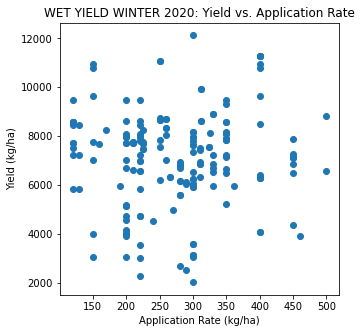

Cor: 0.04512513601967563


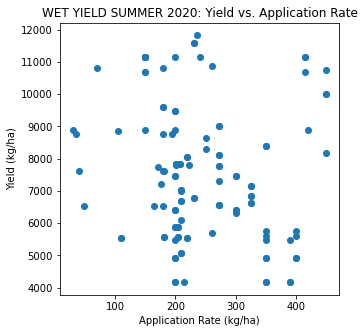

Cor: -0.14861652587906152


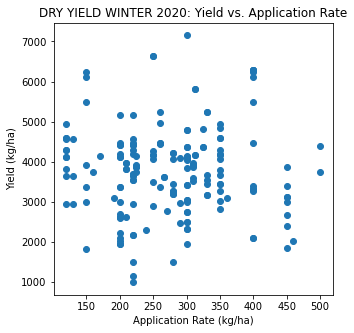

Cor: 0.02272095660962273


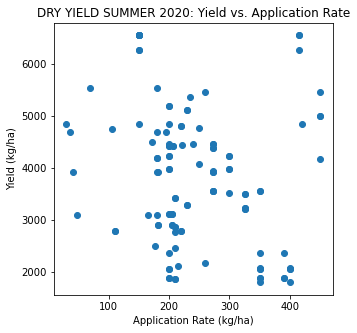

Cor: -0.20167324061553857


In [87]:
df_2020_winter['Application_Rate_kg_per_Ha'] = df_2020_winter['Application_Rate_kg_per_Ha'].astype(float)
df_2020_winter['Wet_Mass_kg_per_ha'] = df_2020_winter['Wet_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2020_winter['Application_Rate_kg_per_Ha'], df_2020_winter['Wet_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('WET YIELD WINTER 2020: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2020_winter['Application_Rate_kg_per_Ha'].corr(df_2020_winter['Wet_Mass_kg_per_ha'])))

df_2020_summer['Application_Rate_kg_per_Ha'] = df_2020_summer['Application_Rate_kg_per_Ha'].astype(float)
df_2020_summer['Wet_Mass_kg_per_ha'] = df_2020_summer['Wet_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2020_summer['Application_Rate_kg_per_Ha'], df_2020_summer['Wet_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('WET YIELD SUMMER 2020: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2020_summer['Application_Rate_kg_per_Ha'].corr(df_2020_summer['Wet_Mass_kg_per_ha'])))

df_2020_winter['Application_Rate_kg_per_Ha'] = df_2020_winter['Application_Rate_kg_per_Ha'].astype(float)
df_2020_winter['Dry_Mass_kg_per_ha'] = df_2020_winter['Dry_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2020_winter['Application_Rate_kg_per_Ha'], df_2020_winter['Dry_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('DRY YIELD WINTER 2020: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2020_winter['Application_Rate_kg_per_Ha'].corr(df_2020_winter['Dry_Mass_kg_per_ha'])))

df_2020_summer['Application_Rate_kg_per_Ha'] = df_2020_summer['Application_Rate_kg_per_Ha'].astype(float)
df_2020_summer['Dry_Mass_kg_per_ha'] = df_2020_summer['Dry_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2020_summer['Application_Rate_kg_per_Ha'], df_2020_summer['Dry_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('DRY YIELD SUMMER 2020: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2020_summer['Application_Rate_kg_per_Ha'].corr(df_2020_summer['Dry_Mass_kg_per_ha'])))

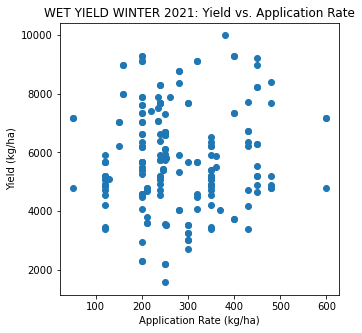

Cor: 0.04851865435843254


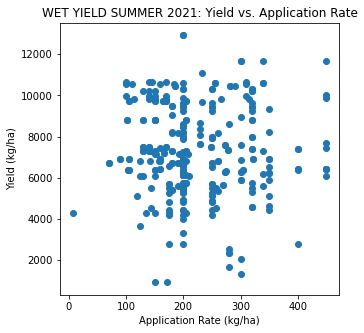

Cor: -0.016257286002292166


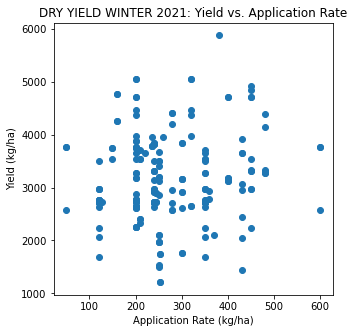

Cor: 0.11431589691779731


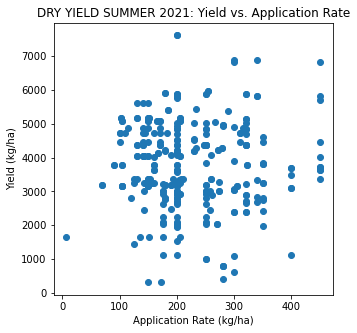

Cor: 0.009758614592955357


In [89]:
df_2021_winter['Application_Rate_kg_per_Ha'] = df_2021_winter['Application_Rate_kg_per_Ha'].astype(float)
df_2021_winter['Wet_Mass_kg_per_ha'] = df_2021_winter['Wet_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2021_winter['Application_Rate_kg_per_Ha'], df_2021_winter['Wet_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('WET YIELD WINTER 2021: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2021_winter['Application_Rate_kg_per_Ha'].corr(df_2021_winter['Wet_Mass_kg_per_ha'])))

df_2021_summer['Application_Rate_kg_per_Ha'] = df_2021_summer['Application_Rate_kg_per_Ha'].astype(float)
df_2021_summer['Wet_Mass_kg_per_ha'] = df_2021_summer['Wet_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2021_summer['Application_Rate_kg_per_Ha'], df_2021_summer['Wet_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('WET YIELD SUMMER 2021: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2021_summer['Application_Rate_kg_per_Ha'].corr(df_2021_summer['Wet_Mass_kg_per_ha'])))

df_2021_winter['Application_Rate_kg_per_Ha'] = df_2021_winter['Application_Rate_kg_per_Ha'].astype(float)
df_2021_winter['Dry_Mass_kg_per_ha'] = df_2021_winter['Dry_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2021_winter['Application_Rate_kg_per_Ha'], df_2021_winter['Dry_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('DRY YIELD WINTER 2021: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2021_winter['Application_Rate_kg_per_Ha'].corr(df_2021_winter['Dry_Mass_kg_per_ha'])))

df_2021_summer['Application_Rate_kg_per_Ha'] = df_2021_summer['Application_Rate_kg_per_Ha'].astype(float)
df_2021_summer['Dry_Mass_kg_per_ha'] = df_2021_summer['Dry_Mass_kg_per_ha'].astype(float)
plt.figure(figsize = (5,5))
plt.scatter(df_2021_summer['Application_Rate_kg_per_Ha'], df_2021_summer['Dry_Mass_kg_per_ha'])
plt.xlabel('Application Rate (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.title('DRY YIELD SUMMER 2021: Yield vs. Application Rate')
plt.show()
print('Cor: ' + str(df_2021_summer['Application_Rate_kg_per_Ha'].corr(df_2021_summer['Dry_Mass_kg_per_ha'])))